In [1]:
import pandas

In [2]:
df = pandas.read_csv("creditCardDefaultReduced.csv")

In [3]:
df.shape

(30000, 9)

In [4]:
df.dtypes

Limit_Bal     int64
Education    object
Marriage     object
Age           int64
Pay_0        object
Bill_Amt1     int64
Pay_Amt1      int64
Payment      object
Card         object
dtype: object

In [5]:
df.head()

,Limit_Bal,Education,Marriage,Age,Pay_0,Bill_Amt1,Pay_Amt1,Payment,Card
0,20000,University,married,24,Delay2,3913,0,Missed,Normal
1,120000,University,single,26,ontime,2682,0,Missed,Normal
2,90000,University,single,34,Delay0,29239,1518,Paid,Normal
3,50000,University,married,37,Delay0,46990,2000,Paid,Normal
4,50000,University,married,57,ontime,8617,2000,Paid,Gold


In [6]:
df.tail()

,Limit_Bal,Education,Marriage,Age,Pay_0,Bill_Amt1,Pay_Amt1,Payment,Card
29995,220000,High school,married,39,Delay0,188948,8500,Paid,Gold
29996,150000,High school,single,43,ontime,1683,1837,Paid,Gold
29997,30000,University,single,37,Delay4,3565,0,Missed,Gold
29998,80000,High school,married,41,Delay1,-1645,85900,Missed,Gold
29999,50000,University,married,46,Delay0,47929,2078,Missed,Gold


In [7]:
df.isna().sum()

Limit_Bal    0
Education    0
Marriage     0
Age          0
Pay_0        0
Bill_Amt1    0
Pay_Amt1     0
Payment      0
Card         0
dtype: int64

In [8]:
df.describe()

,Limit_Bal,Age,Bill_Amt1,Pay_Amt1
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,5663.580500
std,129747.661567,9.217904,73635.860576,16563.280354
min,10000.000000,21.000000,-165580.000000,0.000000
25%,50000.000000,28.000000,3558.750000,1000.000000
50%,140000.000000,34.000000,22381.500000,2100.000000
75%,240000.000000,41.000000,67091.000000,5006.000000
max,1000000.000000,79.000000,964511.000000,873552.000000


In [9]:
import sklearn

In [10]:
import sklearn.model_selection

In [11]:
import sklearn.metrics

In [12]:
import numpy

In [13]:
numpy.random.seed(28)

In [14]:
outcome = df['Payment']

In [15]:
outcome

0        Missed
1        Missed
2          Paid
3          Paid
4          Paid
          ...  
29995      Paid
29996      Paid
29997    Missed
29998    Missed
29999    Missed
Name: Payment, Length: 30000, dtype: object

In [16]:
numericFeatures = df [ ['Limit_Bal', 'Bill_Amt1', 'Pay_Amt1', 'Age']  ]
numericFeatures

,Limit_Bal,Bill_Amt1,Pay_Amt1,Age
0,20000,3913,0,24
1,120000,2682,0,26
2,90000,29239,1518,34
3,50000,46990,2000,37
4,50000,8617,2000,57
...,...,...,...,...
29995,220000,188948,8500,39
29996,150000,1683,1837,43
29997,30000,3565,0,37
29998,80000,-1645,85900,41


In [17]:
df.head()

,Limit_Bal,Education,Marriage,Age,Pay_0,Bill_Amt1,Pay_Amt1,Payment,Card
0,20000,University,married,24,Delay2,3913,0,Missed,Normal
1,120000,University,single,26,ontime,2682,0,Missed,Normal
2,90000,University,single,34,Delay0,29239,1518,Paid,Normal
3,50000,University,married,37,Delay0,46990,2000,Paid,Normal
4,50000,University,married,57,ontime,8617,2000,Paid,Gold


In [18]:
df['Marriage'].value_counts()

Marriage
single     15964
married    13659
other        323
unknown       54
Name: count, dtype: int64

In [19]:
dummiesMarriage = pandas.get_dummies(df['Marriage'], prefix="Marriage", drop_first=True)

In [20]:
df['Marriage']

0        married
1         single
2         single
3        married
4        married
          ...   
29995    married
29996     single
29997     single
29998    married
29999    married
Name: Marriage, Length: 30000, dtype: object

In [21]:
dummiesMarriage

,Marriage_other,Marriage_single,Marriage_unknown
0,False,False,False
1,False,True,False
2,False,True,False
3,False,False,False
4,False,False,False
...,...,...,...
29995,False,False,False
29996,False,True,False
29997,False,True,False
29998,False,False,False


In [22]:
dummiesCard = pandas.get_dummies(df['Card'], prefix="Card", drop_first=True)

In [23]:
df['Card'].value_counts()

Card
Normal    18112
Gold      11888
Name: count, dtype: int64

In [24]:
dummiesCard

,Card_Normal
0,True
1,True
2,True
3,True
4,False
...,...
29995,False
29996,False
29997,False
29998,False


In [25]:
df['Card']

0        Normal
1        Normal
2        Normal
3        Normal
4          Gold
          ...  
29995      Gold
29996      Gold
29997      Gold
29998      Gold
29999      Gold
Name: Card, Length: 30000, dtype: object

In [26]:
dummiesPay_0 = pandas.get_dummies(df['Pay_0'], prefix="Pay_0", drop_first=True)

In [27]:
df['Pay_0'].value_counts()

Pay_0
Delay0     14737
ontime      5686
Delay1      3688
unknown     2759
Delay2      2667
Delay3       322
Delay4        76
Delay5        26
Delay8+       19
Delay6        11
Delay7         9
Name: count, dtype: int64

In [28]:
dummiesPay_0.shape

(30000, 10)

In [29]:
features = pandas.concat([numericFeatures, dummiesMarriage, dummiesCard, dummiesPay_0], axis = 1)

In [30]:
features

,Limit_Bal,Bill_Amt1,Pay_Amt1,Age,Marriage_other,Marriage_single,Marriage_unknown,Card_Normal,Pay_0_Delay1,Pay_0_Delay2,Pay_0_Delay3,Pay_0_Delay4,Pay_0_Delay5,Pay_0_Delay6,Pay_0_Delay7,Pay_0_Delay8+,Pay_0_ontime,Pay_0_unknown
0,20000,3913,0,24,False,False,False,True,False,True,False,False,False,False,False,False,False,False
1,120000,2682,0,26,False,True,False,True,False,False,False,False,False,False,False,False,True,False
2,90000,29239,1518,34,False,True,False,True,False,False,False,False,False,False,False,False,False,False
3,50000,46990,2000,37,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,50000,8617,2000,57,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,188948,8500,39,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,150000,1683,1837,43,False,True,False,False,False,False,False,False,False,False,False,False,True,False
29997,30000,3565,0,37,False,True,False,False,False,False,False,True,False,False,False,False,False,False
29998,80000,-1645,85900,41,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [31]:
features = numpy.ascontiguousarray(features)
outcome = numpy.ascontiguousarray(outcome)

In [32]:
featuresTrain, featuresTest, outcomeTrain, outcomeTest = sklearn.model_selection.train_test_split(
    features, outcome, test_size = 0.33)

In [33]:
featuresTrain.shape

(20100, 18)

In [34]:
featuresTest.shape

(9900, 18)

In [35]:
outcomeTrain.shape

(20100,)

In [36]:
outcomeTest.shape

(9900,)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
modelLog = KNeighborsClassifier()

In [39]:
resultLog = modelLog.fit(featuresTrain, outcomeTrain)

In [40]:
predLogTrain = modelLog.predict(featuresTrain)

In [41]:
cmLogTrain = sklearn.metrics.confusion_matrix(outcomeTrain, predLogTrain)

In [42]:
print(cmLogTrain)

[[ 1383  3108]
 [  689 14920]]


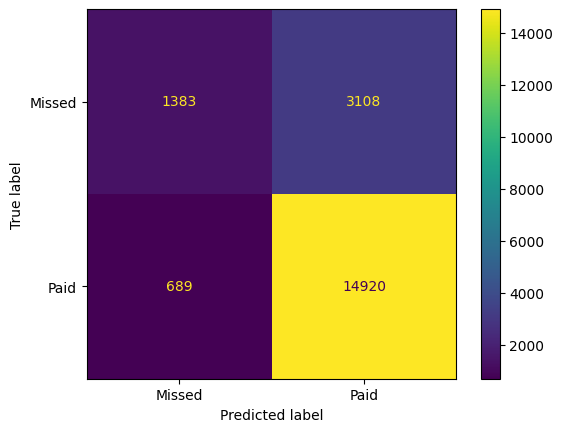

In [43]:
sklearn.metrics.ConfusionMatrixDisplay(cmLogTrain, display_labels = modelLog.classes_).plot()

In [44]:
sklearn.metrics.accuracy_score(outcomeTrain, predLogTrain)

0.8110945273631841

In [45]:
predLogTest = modelLog.predict(featuresTest)

In [46]:
cmLogTest = sklearn.metrics.confusion_matrix(outcomeTest, predLogTest)

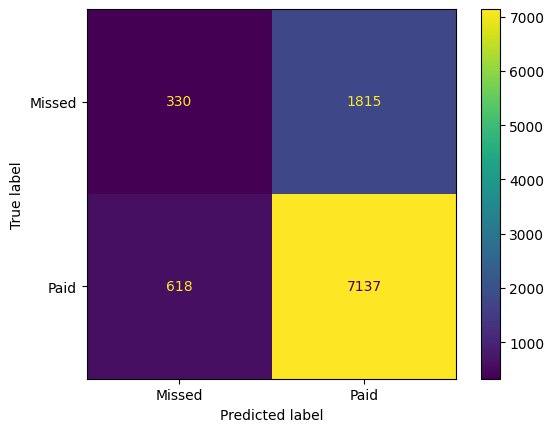

In [47]:
sklearn.metrics.ConfusionMatrixDisplay(cmLogTest, display_labels = modelLog.classes_).plot()

In [48]:
sklearn.metrics.accuracy_score(outcomeTest, predLogTest)

0.7542424242424243

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
modelNB = GaussianNB()

In [51]:
resultNB = modelNB.fit(featuresTrain, outcomeTrain)

In [52]:
predictNB = resultNB.predict(featuresTrain)

In [53]:
cmNBTrain = sklearn.metrics.confusion_matrix(outcomeTrain, predictNB)

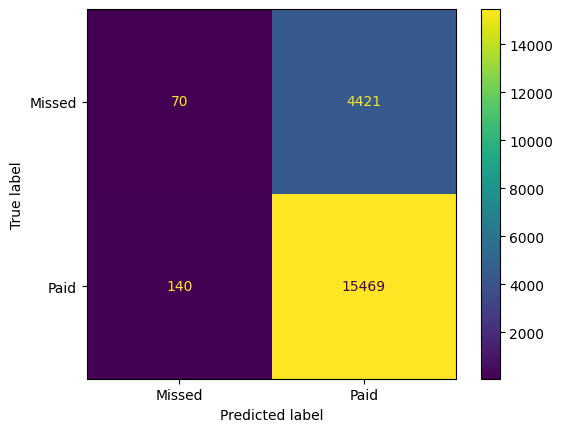

In [54]:
sklearn.metrics.ConfusionMatrixDisplay(cmNBTrain, display_labels = modelNB.classes_).plot()

In [55]:
sklearn.metrics.accuracy_score(outcomeTrain, predictNB)

0.7730845771144279

In [56]:
predNBTest = modelNB.predict(featuresTest)

In [57]:
sklearn.metrics.accuracy_score(outcomeTest, predNBTest)

0.778080808080808